### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

###  Eye-ball raw data

In [65]:
df.head()
print('shape\n',df.shape)
print('\nStatus counts:\n',df.status.value_counts())

df[df['status']==1]['status'].count()/df.status.count()

shape
 (195, 23)

Status counts:
 1    147
0     48
Name: status, dtype: int64


0.7538461538461538

In [4]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
df.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

Status i.e. the target variable is unbalanced as 75% data is in class 1 and only 25% is in class 0
name is identifier and should be removed.
There are no missing value

### Univariate Analysis

In [6]:
df_desc=df.describe().T
df_desc['upper_bound']=df_desc['mean']+(1.5*(df_desc['75%']-df_desc['25%']))
df_desc['lower_bound']=df_desc['mean']-(1.5*(df_desc['75%']-df_desc['25%']))
df_desc

,count,mean,std,min,25%,50%,75%,max,upper_bound,lower_bound
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,252.024141,56.433141
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,331.119418,63.090418
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,199.915881,32.733381
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,0.012078,0.000363
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,0.000104,-0.000016
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,0.006569,0.000044
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,0.006589,0.000304
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,0.019700,0.000140
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,0.061779,-0.002361
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,0.584501,-0.019999


In [7]:
df.columns=['name','Fo','Fhi','Flo','Jitter%','Jitter','RAP','PPQ','DDP','Shimmer','ShimmerdB','APQ3','APQ5','APQ','DDA','NHR','HNR','status', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']

In [8]:
df.shape

(195, 24)

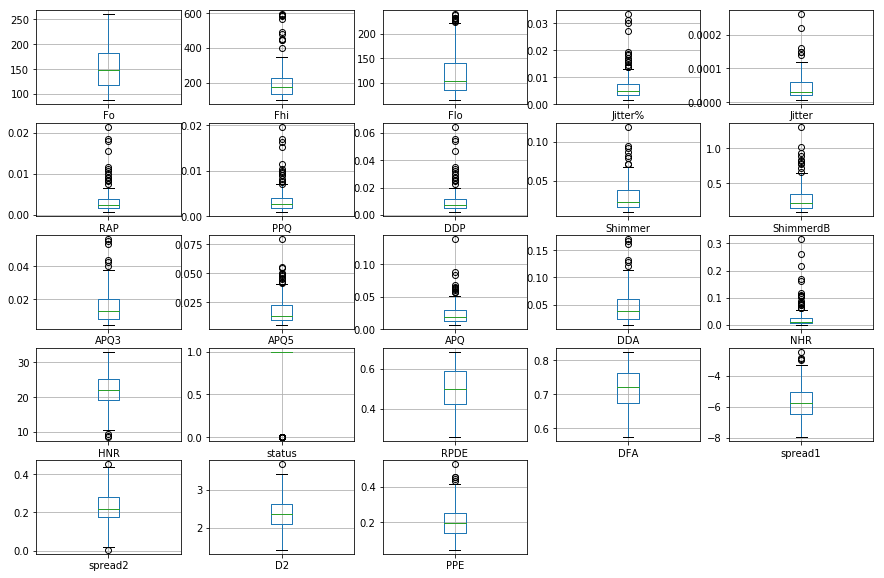

In [9]:
x=df.columns.tolist()
x.pop(0)
plt.figure(figsize=(15,10))
for i,z in zip(range(df.shape[1]-1),x):
    plt.subplot(5,5,i+1)
    df.boxplot(column=z)

In [10]:
df=df.drop('name',axis=1)

With Box plots we understand presence of outliers in most of the variables. But since decision trees are robust to outliers
we dont have to treat them

### Bivariate Analysis

C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


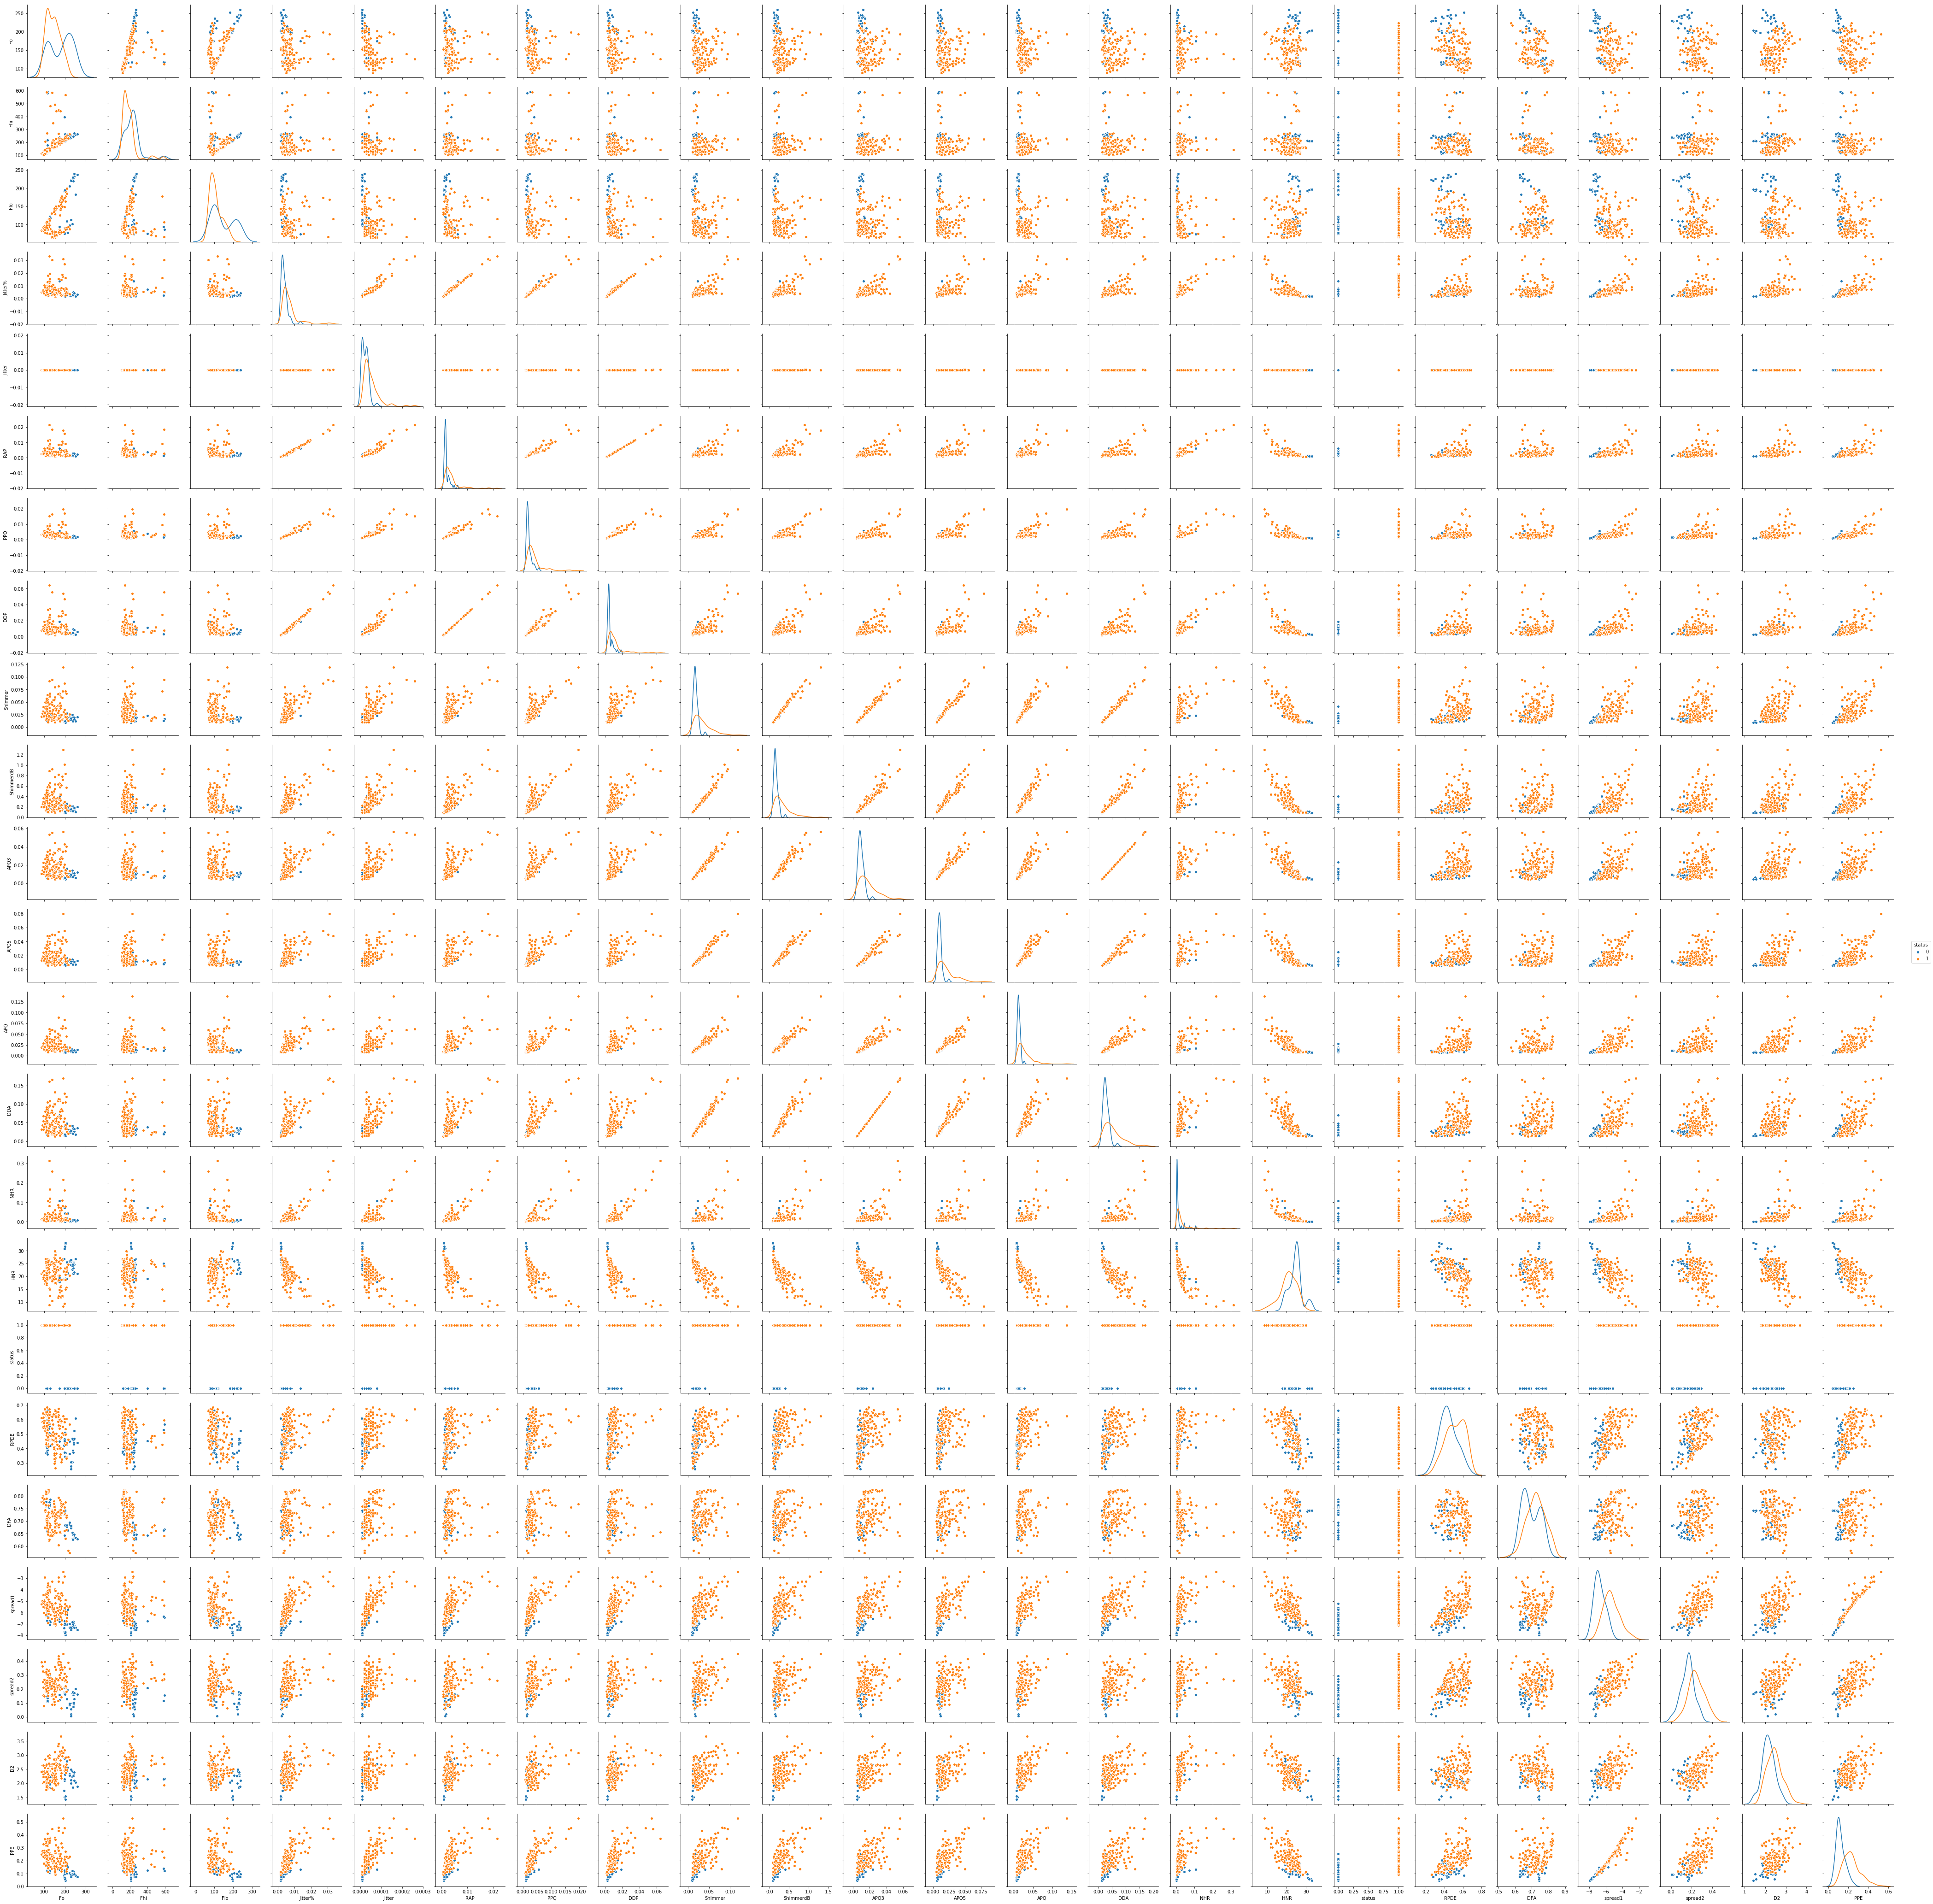

In [11]:
sns.pairplot(df,diag_kind='kde',hue='status')

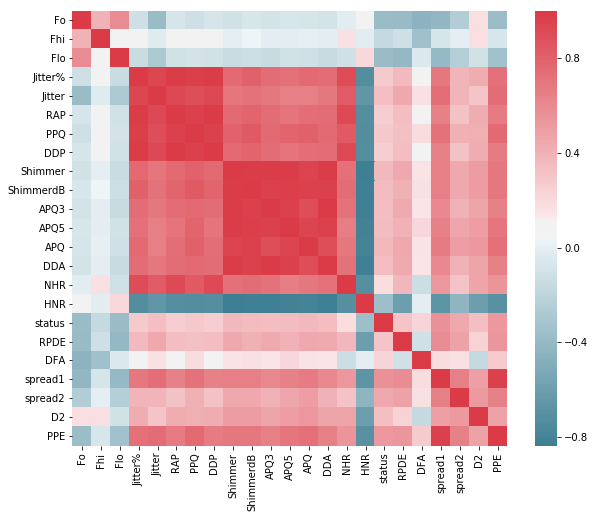

In [12]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

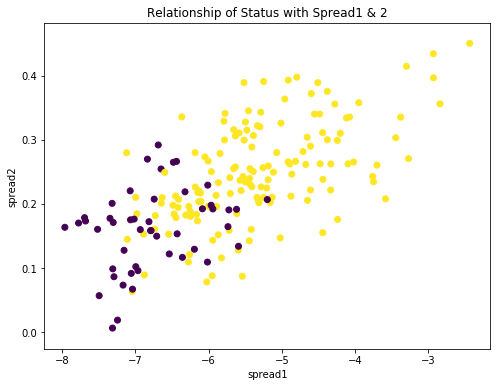

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(df.spread1,df.spread2,c=df.status)
plt.xlabel('spread1')
plt.ylabel('spread2')
plt.title('Relationship of Status with Spread1 & 2')
plt.show()

Bivariate Analysis

Spread 1 & 2 seems to seperate status well.<br />
Trees are immune to multicollinearity and thus we don't have to treat it.<br />
Trees are robust to outliers and thus we don't have to handle outliers.

### Splitting Data

In [79]:
X=df
X=X.drop('status',axis=1)
Y=df.status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=18)
print(X_train.shape)
print(X_test.shape)



(136, 22)
(59, 22)


### Building Model

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=None )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Accuracy of Model

In [81]:
y_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print('model Score',model_score,'\n')
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_predict))

model Score 0.8305084745762712 

Confusion Matrix
 [[12  6]
 [ 4 37]]


In [82]:
# Clasification report
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.75      0.67      0.71        18
          1       0.86      0.90      0.88        41

avg / total       0.83      0.83      0.83        59



In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(scores.mean())
print(scores.std())

0.8449735449735449
0.05001609438347715


In [84]:
IMP=pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)
IMP.sort_values(by='Imp',ascending=False)

,Imp
spread1,0.394246
spread2,0.183666
Flo,0.178765
RPDE,0.170643
DFA,0.072680
Fo,0.000000
APQ,0.000000
D2,0.000000
HNR,0.000000
NHR,0.000000


In [85]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


train_char_label = ['No', 'Yes']

Credit_Tree_File = open('tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()



<img src=tree1.png>

### Regularization parameters

In [20]:
dt_model.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [36]:
params = {'max_depth': list(range(1, 6)),
          'min_samples_leaf': list(range(1, 20))}

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV( DecisionTreeClassifier(criterion = 'entropy' ), params, n_jobs=-1, verbose=1)


grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 95 candidates, totalling 285 fits


[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed:    4.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [41]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8135593220338984

In [43]:
rtree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
rtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rtree, X_train, y_train, cv=5)
print(scores.mean())
print(scores.std())

0.8669312169312168
0.06060222393316452


In [44]:
train_char_label = ['No', 'Yes']
tree.export_graphviz(rtree,
                out_file="rtree.dot",
                feature_names= list(X_train),
                class_names=train_char_label,
                rounded=True,
                filled=True)

<img src=rtree.png>

In [45]:
y_predict = rtree.predict(X_test)
model_score = rtree.score(X_test, y_test)
print('model Score',model_score,'\n')
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_predict))

model Score 0.8135593220338984 

Confusion Matrix
 [[12  6]
 [ 5 36]]


In [46]:
# Clasification report
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.71      0.67      0.69        18
          1       0.86      0.88      0.87        41

avg / total       0.81      0.81      0.81        59



With Regularization accuracy gets slightly decreased

Tree without Regularization
model Score 0.8305084745762712 
Confusion Matrix
 [[12  6]
 [ 4 37]]
 
 Tree With Regularization
 model Score 0.8135593220338984 
 Confusion Matrix
 [[12  6]
 [ 5 36]]
 
 It is just because of chance and limited test data that regularized test accuracy is less for regularized tree.
 
 
But Regularization has helped and reduce overfitting as the depth of the tree has been reduced from 6 to 2 and it increases the interpretation of the model.
Also Crossvalidation accuracy for both the models are comparable and even the variation in crossvalidation accuracy is slighly reduced for regularized model.
Even precision, recall and f1 score of both the models are comparable.

Thus Regulariztion mitigates the problem of overfitting upto some extent.


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
rfcl.score(X_test , y_test)

0.8983050847457628

In [54]:
params = {'n_estimators': list(range(5, 30))}

grid_search_cv = GridSearchCV( RandomForestClassifier(), params, n_jobs=-1, verbose=1)


grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [56]:
grid_search_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9152542372881356

In [59]:
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[15  3]
 [ 2 39]]


In [60]:
# Clasification report
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.83      0.86        18
          1       0.93      0.95      0.94        41

avg / total       0.91      0.92      0.91        59



15 trees give the best optimal results in random forests.<br/>
Accuracy of Random Forest is much higher than decision trees.